# Avg Cost of Undergrad College by State

In [1]:
import pandas as pd
data=pd.read_csv(r"nces330_20.csv")

In [2]:
data.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


### About Dataset

Compiled from the National Center of Education Statistics Annual Digest. Specifically, Table 330.20: Average undergraduate tuition and fees and room and board rates charged for full-time students in degree-granting postsecondary institutions, by control and level of institution and state or jurisdiction.

### Objective of the porject

The goal of this machine learning project is to predict cost og undergraduate tution 

### Features Description

In [3]:
from pandas_profiling import ProfileReport
Report=ProfileReport(data)
Report.to_file(output_file='Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

> **Variable types**

1. There are 6 variables
* Continuous	1
* Categorical	5

2. Categorical Attributes
* State
* Year
* Type
* Length
* Expense

3. Continuous Attributes
* Valus



### Import packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## EDA

In [5]:
data.shape

(3548, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


In [7]:
data.isnull().mean()*100

Year       0.0
State      0.0
Type       0.0
Length     0.0
Expense    0.0
Value      0.0
dtype: float64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3548.0,2016.923337,2.553910,2013.0,2015.00,2017.0,2019.00,2021.0
Value,3548.0,13027.720124,8734.568645,1225.0,7756.75,10203.5,14830.75,49152.0


### Summary

1. There are 6 columns and 3548 rows
2. zero null values 
3. zero duplicated rows
4. 4 object dtype and 2 int

> **For Year:**

1. The mean value of year is 2016.9 ie, avg value of year is 2017
2. Year with in 2013 to 2021
3. The differnce b/w 50% and 25% ,50% and 75% are same
   ie, This suggests that there is no significant skew in the data

> **For Value:**

1. The mean value of the observations is 13027.72.
2. The standard deviation is 8734.57, which indicates that the observations are spread out over a wide range of values.
3. values with in 49152 and 1225
4. mean is greater than the median ie, data is possitivly skewed 

#### Summory categorical attribute

In [9]:
data.describe(include=["O"]).T

,count,unique,top,freq
State,3548,51,Alabama,71
Type,3548,3,Public Out-of-State,1347
Length,3548,2,4-year,2672
Expense,3548,2,Fees/Tuition,2198


> **State:**

1. 51 Unique values
2. Most frequently occuring Alabama 
3. which appears 71 times

> **Type:**

1. 3 Unique Values
2. Most frequently occuring Public Out-of-State
3. which appears 1347 times

> **Length:**

1. only 2 Unique Values
2. frequently occuring '4-year', 2672 times

> **Expense:**

1. only 2 Unique Values
2. frequently occuring Fees/Tuition, 2198 times

In [10]:
data.Length=data.Length.str[0]

In [11]:
data.Length=data.Length.astype(int)

## Univariate analysis

#### Distribution

> **Value**

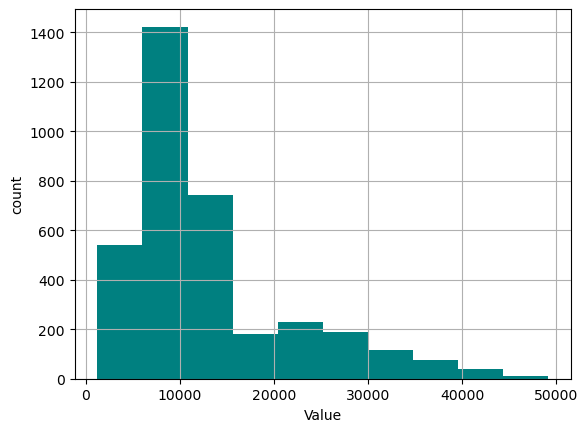

In [12]:
data.Value.hist(color='Teal')
plt.xlabel('Value')
plt.ylabel('count')
plt.show()

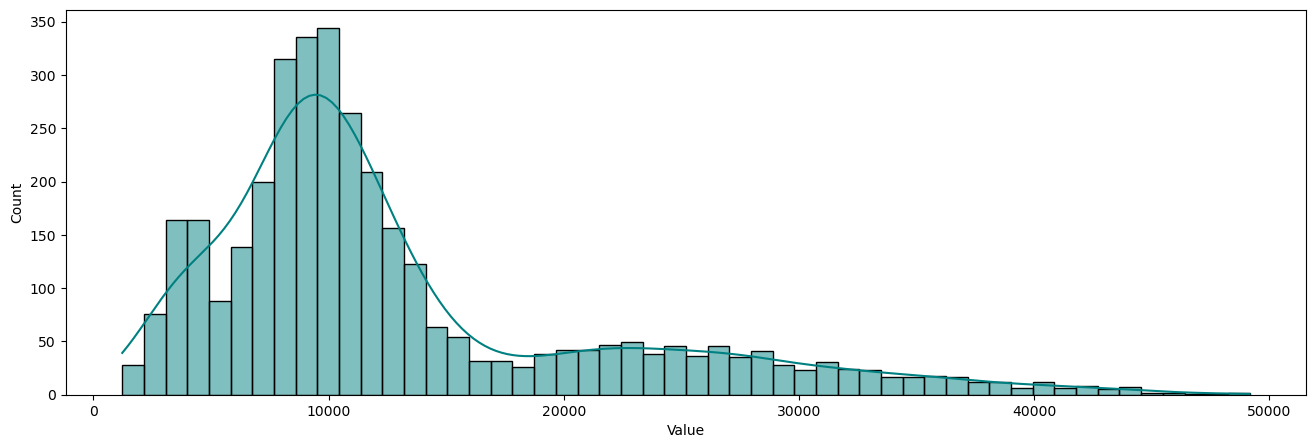

In [13]:
plt.figure(figsize=(16,5))
sns.histplot(data=data,x='Value',kde=True,color='Teal')
plt.show()

* Value attribute is not symmetric.
* it is right-skewed

In [14]:
import warnings
warnings.filterwarnings("ignore")

> **Length**

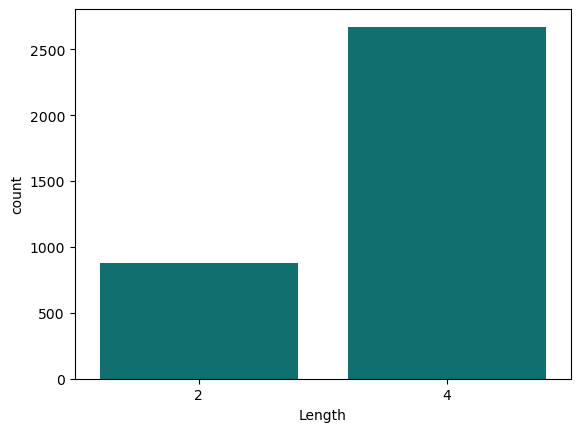

In [15]:
sns.countplot(data.Length,color='Teal')
plt.show()

* 2 Unique values 2 and 5
* 4 count is more than 2500 and 2 below 1000

In [16]:
data.head(1)

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4,Fees/Tuition,13983


> **Type**

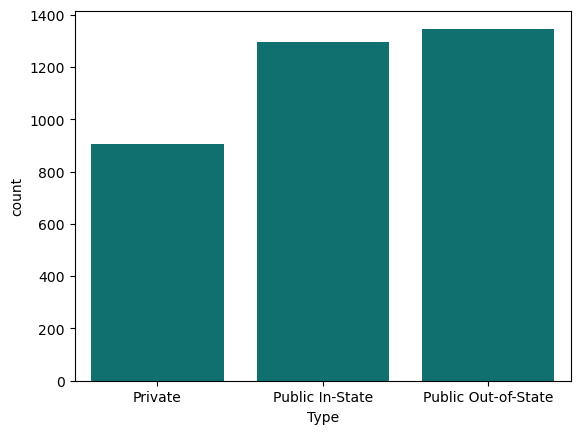

In [17]:
sns.countplot(data.Type,color='Teal')
plt.show()

1. there are 3 uniqe values
2. Public out of state is more frequently occuring but also similer than public in state type
3. but Private count below 1000

> **State**

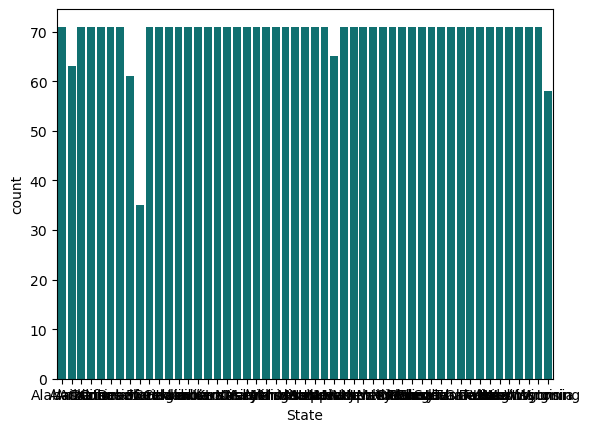

In [18]:
sns.countplot(data.State,color='Teal')
plt.show()

1. almost every count is same (70)

> **Expense**

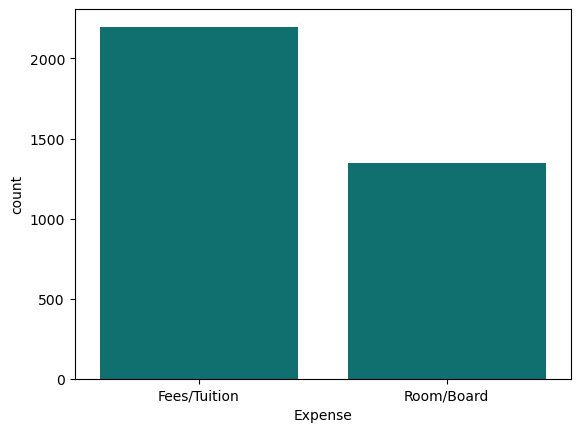

In [19]:
sns.countplot(data.Expense,color='Teal')
plt.show()

* There is only 2 Unique values
* ie, expence chatogorysed by 2 

> **Year**

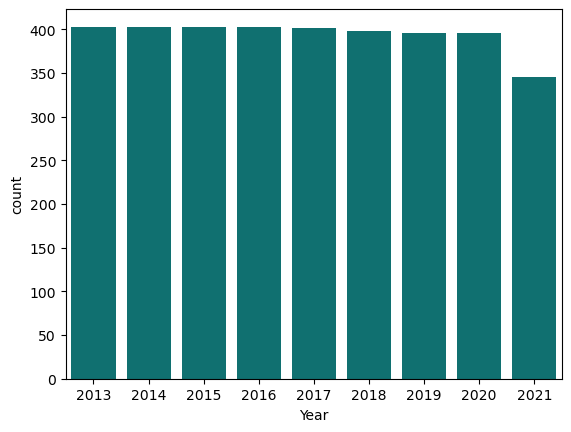

In [20]:
sns.countplot(data.Year,color='Teal')
plt.show()

* only 2021 there are 350 records
* and all other years have 400 records
* year with in 2013 to 2021

### Bivariate analysis

In [21]:
data.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4,Fees/Tuition,13983
1,2013,Alabama,Private,4,Room/Board,8503
2,2013,Alabama,Public In-State,2,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4,Room/Board,8473


> **value(traget)**

* expense-value

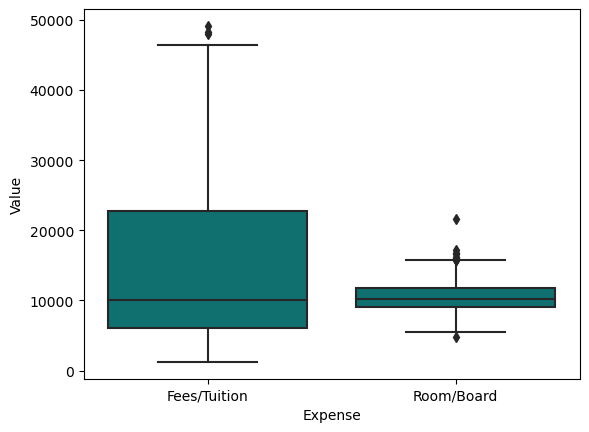

In [22]:
sns.boxplot(x="Expense", y="Value", data=data,color='Teal')
plt.show()

* Bivariate Analysis with the boxplot
1. Fees/Tuition ammot is hight iqr compaing to Room/Board
2. also the medean of both are same
3. in Fees/Tuition has more high values

> **Length-Value**

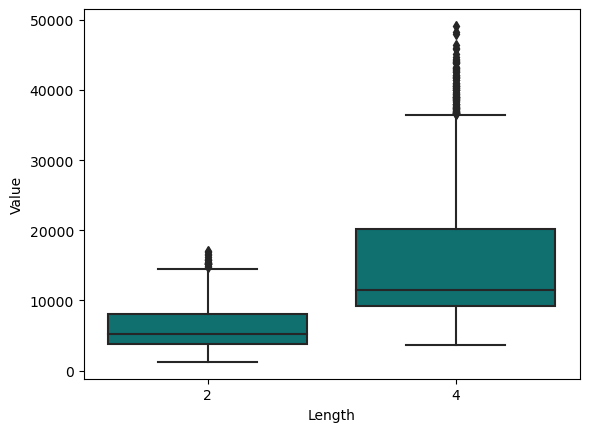

In [23]:
sns.boxplot(x="Length", y="Value", data=data,color='Teal')
plt.show()

* Length 2 is less expense compering to length 4

> **Year-values**

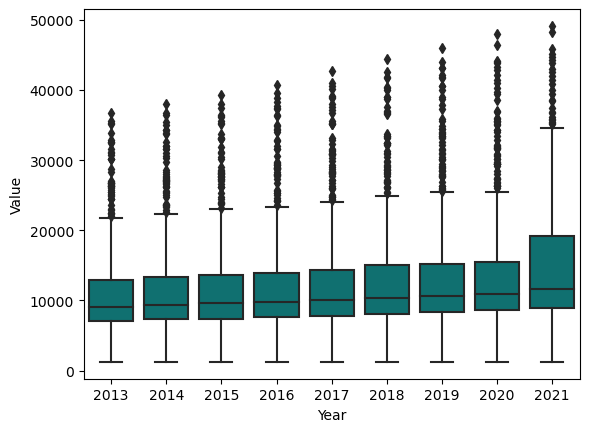

In [24]:
sns.boxplot(x="Year", y="Value", data=data,color='Teal')
plt.show()

* Increasing the cost eavery each year

> **Type-Value**

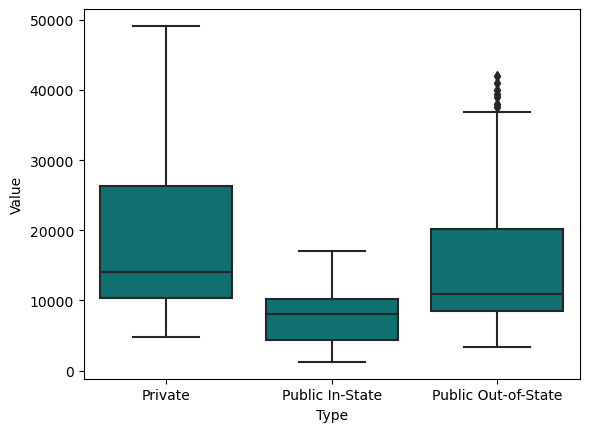

In [25]:
sns.boxplot(x="Type", y="Value", data=data,color='Teal')
plt.show()

* public in stat type has low cost

> **State-Value**

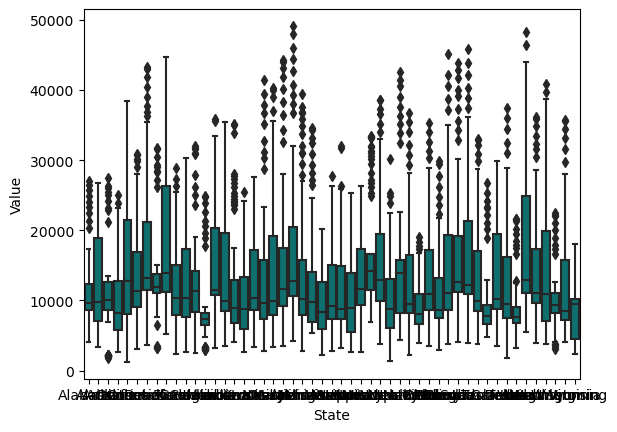

In [26]:
sns.boxplot(x="State", y="Value", data=data,color='Teal')
plt.show()

* each state has different type of value/cost

#### Plot Relation

Length

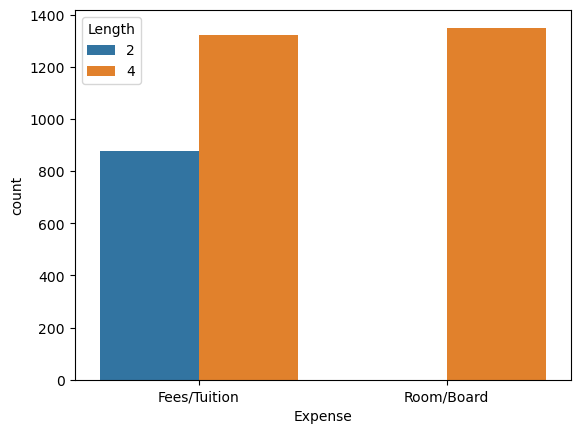

In [27]:
sns.countplot(x="Expense", hue="Length", data=data)
plt.show()

* there only length 4 in Room/Board that has 1400 count

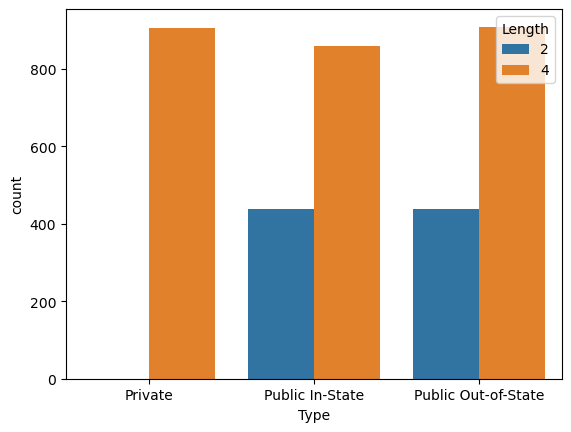

In [28]:
sns.countplot(x="Type", hue="Length", data=data)
plt.show()

* privet sector has only length 4

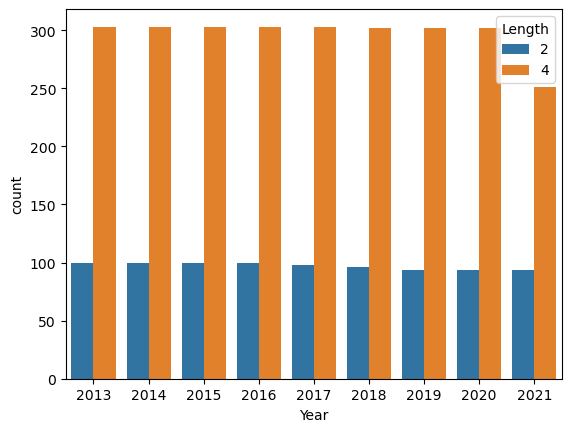

In [29]:
sns.countplot(x="Year", hue="Length", data=data)
plt.show()

* each year same length 

#### corr()

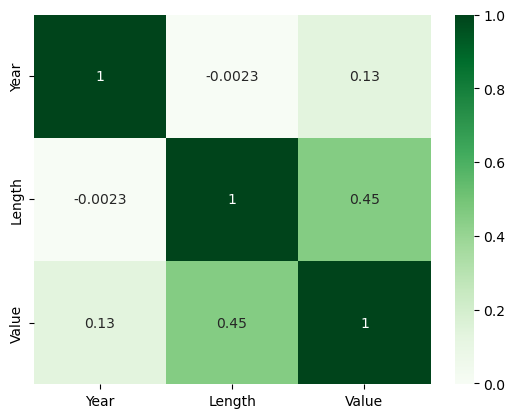

In [30]:
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

1. summery of eda
* here we need to take all the variabe
* each variable is different
* each variable affecting target 

In [31]:
y=data.Value
x=data.drop('Value',axis=1)

### train test

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [84]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2838, 5), (710, 5), (2838,), (710,))

In [80]:
x_test.to_csv('x_test.csv')

### Preprocessing

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [70]:
 transformer=ColumnTransformer(transformers=[
     ('tnf',OneHotEncoder(sparse=False,drop='first'),['State','Type','Expense'])
 ],remainder='passthrough')

In [71]:
x_train=transformer.fit_transform(x_train)
x_test=transformer.transform(x_test)

In [72]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Model Building

##### importing Models

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold

In [39]:
# Create a list of models to evaluate
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(kernel='linear')
]

# Evaluate each model using k-fold cross-validation
results = []
names = []
kfold = KFold(n_splits=10, shuffle=True, random_state=15)

for model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(type(model).__name__)
    print(f'{type(model).__name__} - R^2: {np.mean(cv_results):.3f} ({np.std(cv_results):.3f})')

LinearRegression - R^2: 0.675 (0.024)
DecisionTreeRegressor - R^2: 0.941 (0.024)
RandomForestRegressor - R^2: 0.960 (0.010)
GradientBoostingRegressor - R^2: 0.837 (0.019)
SVR - R^2: 0.078 (0.040)


### Evaluation

* here we can best model is RandomForestRegressor
* accuracy = 96% and std =.011
* also DecisionTree giving accuracy of 94 %
* we can test data using test

#### RandomForest

In [40]:
R_model=RandomForestRegressor()

#trining our data
R_model.fit(x_train,y_train)

#predicting
R_pred=R_model.predict(x_test)

In [41]:
from sklearn import metrics
print(f"Mean Abslote Error : {metrics.mean_absolute_error(y_test,R_pred)}")
print(f"Mean Squared Error : {metrics.mean_squared_error(y_test,R_pred)}")
print(f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(y_test,R_pred))}")
print(f"R^2 : {metrics.r2_score(y_test,R_pred)}")

Mean Abslote Error : 916.1392253521126
Mean Squared Error : 3387438.291216197
Root Mean Squared Error : 1840.4994678663172
R^2 : 0.9555249743878929


#### DecisionTreeRegressor

In [42]:
D_model=DecisionTreeRegressor()

#training
D_model.fit(x_train,y_train)

#predicting
D_pred=D_model.predict(x_test)

In [43]:
print(f"Mean Abslote Error : {metrics.mean_absolute_error(y_test,R_pred)}")
print(f"Mean Squared Error : {metrics.mean_squared_error(y_test,R_pred)}")
print(f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(y_test,R_pred))}")
print(f"R^2 : {metrics.r2_score(y_test,R_pred)}")

Mean Abslote Error : 916.1392253521126
Mean Squared Error : 3387438.291216197
Root Mean Squared Error : 1840.4994678663172
R^2 : 0.9555249743878929


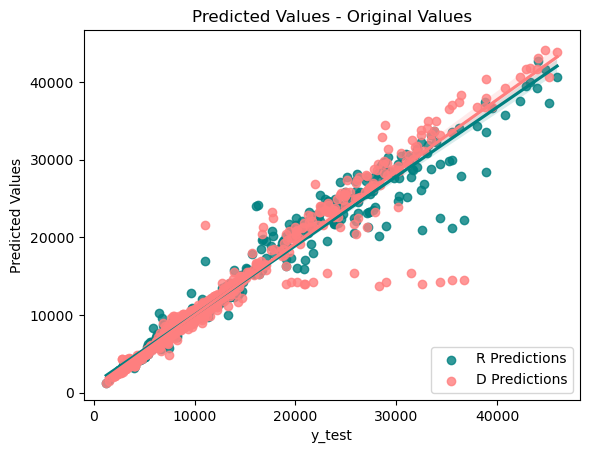

In [44]:
sns.regplot(y_test, R_pred,color='Teal',label='R Predictions')
sns.regplot(y_test,D_pred,color='#FF7F7F',label='D Predictions')
plt.title('Predicted Values - Original Values')
plt.xlabel('y_test')
plt.ylabel('Predicted Values')
plt.legend(loc=4)
plt.show()

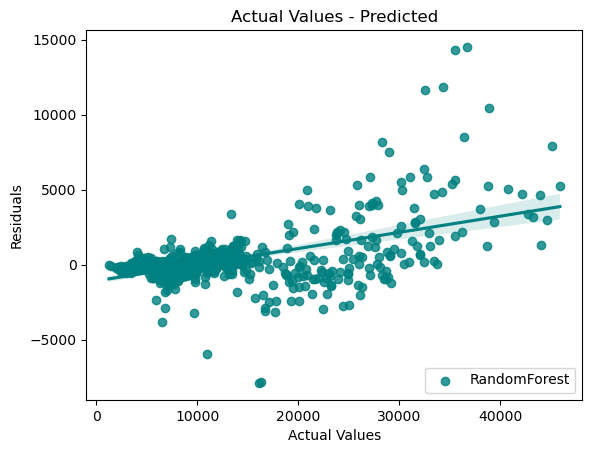

In [45]:
sns.regplot(y_test, y_test-R_pred, color='Teal',label='RandomForest')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Actual Values - Predicted')
plt.legend(loc=4)
plt.show()

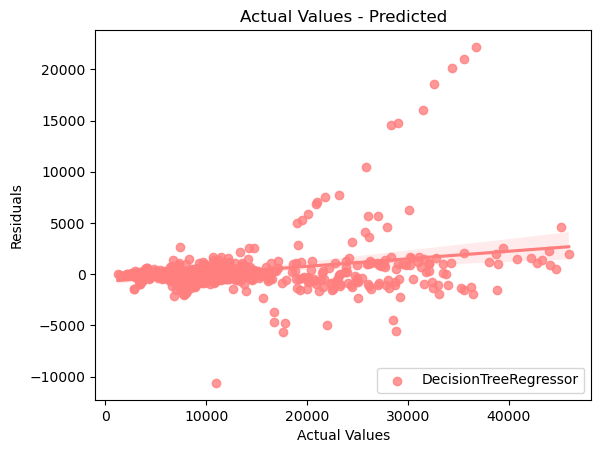

In [46]:
sns.regplot(y_test, y_test-D_pred, color='#FF7F7F',label='DecisionTreeRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Actual Values - Predicted')
plt.legend(loc=4)
plt.show()

* Best model I selecting here RandomForest
* the differnce b/w the actual and predicted closs to zero
* std is less compering to DecisionTree

In [47]:
import pickle

In [48]:
filename = 'collage_price_model.sav'
pickle.dump(R_model,open(filename,'wb'))

In [50]:
#testing loaded model
testing_model = pickle.load(open('collage_price_model.sav','rb'))

In [51]:
test_pred=testing_model.predict(x_test)

In [58]:
if np.all(test_pred==R_pred):
    print('Good')

Good


In [76]:
pickle.dump(scaler,open('sc.pkl','wb'))

In [77]:
pickle.dump(transformer,open('transformer.pkl','wb'))